# **Exploratory Data Analysis (EDA)**

**Objective:**
Explore the data, understand relationships between features, handle missing values and outliers, visualize findings.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

In [2]:
raw_data = pd.read_csv("../datasets/tiktok_dataset.csv")
data = pd.read_csv("../datasets/tiktok_dataset.csv")

In [3]:
pd.set_option('display.max_colwidth', 20)
pd.set_option("display.max_columns",None)

# Data Exploration and Cleaning

In [4]:
data

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared w...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared w...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared w...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared w...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared w...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [6]:
data = data.drop(columns=["#","video_id"])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   claim_status              19084 non-null  object 
 1   video_duration_sec        19382 non-null  int64  
 2   video_transcription_text  19084 non-null  object 
 3   verified_status           19382 non-null  object 
 4   author_ban_status         19382 non-null  object 
 5   video_view_count          19084 non-null  float64
 6   video_like_count          19084 non-null  float64
 7   video_share_count         19084 non-null  float64
 8   video_download_count      19084 non-null  float64
 9   video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [8]:
data.duplicated().sum()

200

In [9]:
mask_null_data = data.isna()
mask_null_data = mask_null_data.any(axis=1)
mask_null_data.value_counts()

False    19084
True       298
Name: count, dtype: int64

In [10]:
data[mask_null_data].info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 19084 to 19381
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   claim_status              0 non-null      object 
 1   video_duration_sec        298 non-null    int64  
 2   video_transcription_text  0 non-null      object 
 3   verified_status           298 non-null    object 
 4   author_ban_status         298 non-null    object 
 5   video_view_count          0 non-null      float64
 6   video_like_count          0 non-null      float64
 7   video_share_count         0 non-null      float64
 8   video_download_count      0 non-null      float64
 9   video_comment_count       0 non-null      float64
dtypes: float64(5), int64(1), object(4)
memory usage: 25.6+ KB


In [11]:
# I removed these reports because they have too much missing values and are only 1.5% of the entire dataset
data = data[~mask_null_data]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   claim_status              19084 non-null  object 
 1   video_duration_sec        19084 non-null  int64  
 2   video_transcription_text  19084 non-null  object 
 3   verified_status           19084 non-null  object 
 4   author_ban_status         19084 non-null  object 
 5   video_view_count          19084 non-null  float64
 6   video_like_count          19084 non-null  float64
 7   video_share_count         19084 non-null  float64
 8   video_download_count      19084 non-null  float64
 9   video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.6+ MB


#### **Find out the differences between reports that have the claim_status claim and those that have the claim status opinion. By that we can identify variables/features that are important to predict the claim status**

In [13]:
raw_data.groupby(["claim_status"]).describe()

#                                                   \
               count     mean          std     min       25%      50%   
claim_status                                                            
claim         9608.0   4804.5  2773.735027     1.0   2402.75   4804.5   
opinion       9476.0  14346.5  2735.629909  9609.0  11977.75  14346.5   

                                video_id                              \
                   75%      max    count          mean           std   
claim_status                                                           
claim          7206.25   9608.0   9608.0  5.627264e+09  2.543869e+09   
opinion       16715.25  19084.0   9476.0  5.622382e+09  2.530209e+09   

                                                                      \
                       min           25%           50%           75%   
claim_status                                                           
claim         1.236285e+09  3.400723e+09  5.607672e+09  7.834910e+09   
opinion       1.234959e+09  3.448802e+09  5.611857e+09  7.853243e+09   

                           video_duration_sec                             \
                       max              count       mean        std  min   
claim_status                                                               
claim         9.999873e+09             9608.0  32.486886  16.172409  5.0   
opinion       9.999835e+09             9476.0  32.359856  16.281705  5.0   

                                     video_view_count                 \
               25%   50%   75%   max            count           mean   
claim_status                                                           
claim         18.0  32.0  47.0  60.0           9608.0  501029.452748   
opinion       18.0  32.0  47.0  60.0           9476.0    4956.432250   

                                                                               \
                        std     min        25%       50%        75%       max   
claim_status                                                                    
claim         291349.239825  1049.0  247003.75  501555.0  753088.00  999817.0   
opinion         2885.907219    20.0    2467.00    4953.0    7447.25    9998.0   

             video_like_count                                               \
                        count           mean            std  min       25%   
claim_status                                                                 
claim                  9608.0  166373.331182  147623.370888  0.0  43436.75   
opinion                9476.0    1092.729844     964.099816  0.0    289.00   

                                            video_share_count                \
                   50%        75%       max             count          mean   
claim_status                                                                  
claim         123649.0  255715.25  657830.0            9608.0  33026.416216   
opinion          823.0    1664.00    4375.0            9476.0    217.145631   

                                                                      \
                       std  min      25%      50%      75%       max   
claim_status                                                           
claim         38781.676825  0.0  5062.25  17997.5  47256.0  256130.0   
opinion         252.269583  0.0    34.00    121.0    314.0    1674.0   

             video_download_count                                         \
                            count         mean          std  min     25%   
claim_status                                                               
claim                      9608.0  2070.952227  2424.381846  0.0  324.75   
opinion                    9476.0    13.677290    16.200652  0.0    2.00   

                                      video_comment_count              \
                 50%     75%      max               count        mean   
claim_status                                                            
claim         1139.5  2935.5  14994

In [14]:
data_claim_group = data.groupby(["claim_status"])

In [15]:
data_claim_group.describe()

video_duration_sec                                               \
                          count       mean        std  min   25%   50%   75%   
claim_status                                                                   
claim                    9608.0  32.486886  16.172409  5.0  18.0  32.0  47.0   
opinion                  9476.0  32.359856  16.281705  5.0  18.0  32.0  47.0   

                   video_view_count                                        \
               max            count           mean            std     min   
claim_status                                                                
claim         60.0           9608.0  501029.452748  291349.239825  1049.0   
opinion       60.0           9476.0    4956.432250    2885.907219    20.0   

                                                       video_like_count  \
                    25%       50%        75%       max            count   
claim_status                                                              
claim         247003.75  501555.0  753088.00  999817.0           9608.0   
opinion         2467.00    4953.0    7447.25    9998.0           9476.0   

                                                                     \
                       mean            std  min       25%       50%   
claim_status                                                          
claim         166373.331182  147623.370888  0.0  43436.75  123649.0   
opinion         1092.729844     964.099816  0.0    289.00     823.0   

                                  video_share_count                \
                    75%       max             count          mean   
claim_status                                                        
claim         255715.25  657830.0            9608.0  33026.416216   
opinion         1664.00    4375.0            9476.0    217.145631   

                                                                      \
                       std  min      25%      50%      75%       max   
claim_status                                                           
claim         38781.676825  0.0  5062.25  17997.5  47256.0  256130.0   
opinion         252.269583  0.0    34.00    121.0    314.0    1674.0   

             video_download_count                                         \
                            count         mean          std  min     25%   
claim_status                                                               
claim                      9608.0  2070.952227  2424.381846  0.0  324.75   
opinion                    9476.0    13.677290    16.200652  0.0    2.00   

                                      video_comment_count              \
                 50%     75%      max               count        mean   
claim_status                                                            
claim         1139.5  2935.5  14994.0              9608.0  691.164863   
opinion          7.0    19.0    101.0              9476.0    2.697446   

                                                            
                      std  min   25%    50%    75%     max  
claim_status                                                
claim         1017.216834  0.0  68.0  286.0  886.0  9599.0  
opinion          4.089288  0.0   0.0    1.0    3.0    32.0

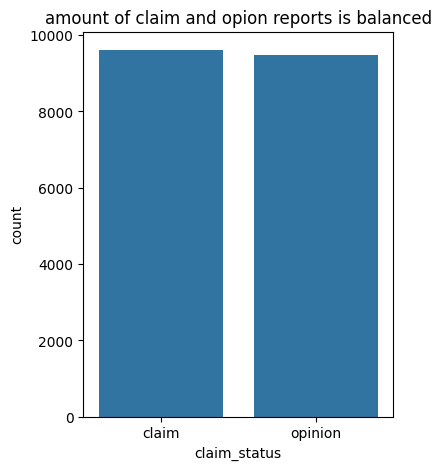

In [16]:
plt.figure(figsize=(4,5))
sns.barplot(data["claim_status"].value_counts())
plt.title("amount of claim and opion reports is balanced")
plt.show()

In [17]:
rates_claim_ratio = data.groupby(["claim_status"]).mean(numeric_only=True).drop(columns="video_duration_sec")
rates_claim_ratio

,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
claim_status,,,,,
claim,501029.452748,166373.331182,33026.416216,2070.952227,691.164863
opinion,4956.432250,1092.729844,217.145631,13.677290,2.697446


In [18]:
rates_claim_ratio.loc["ratio"] = rates_claim_ratio.loc["claim"]/ rates_claim_ratio.loc["opinion"] 
rates_claim_ratio.astype(int)
rates_claim_ratio.columns = rates_claim_ratio.columns.str.replace("video_","") 
rates_claim_ratio.columns = rates_claim_ratio.columns.str.replace("_count","s") 


In [19]:
rates_claim_ratio

,views,likes,shares,downloads,comments
claim_status,,,,,
claim,501029.452748,166373.331182,33026.416216,2070.952227,691.164863
opinion,4956.432250,1092.729844,217.145631,13.677290,2.697446
ratio,101.086715,152.254770,152.093395,151.415392,256.229343


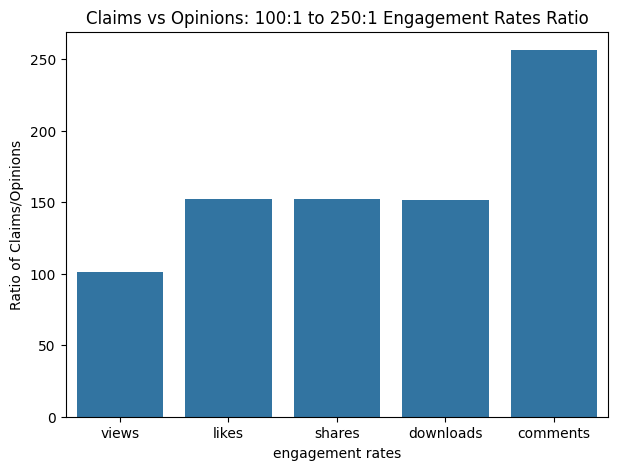

In [20]:
plt.figure(figsize=(7,5))
sns.barplot(rates_claim_ratio.loc["ratio"])

plt.xlabel("engagement rates")
plt.ylabel("Ratio of Claims/Opinions")
plt.title("Claims vs Opinions: 100:1 to 250:1 Engagement Rates Ratio")

plt.show()

**This graph shows how many times higher the engagment rates of claims are compared to the engagement rates of opinions. <br/> 
For example, claims have an average view count that is 100 times higher than opinions.**

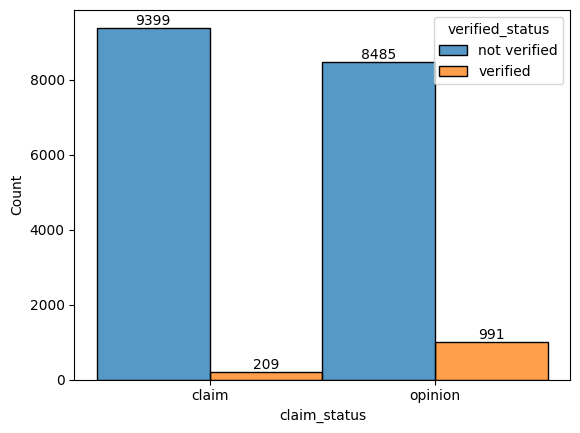

In [21]:
# Create a histogram
ax = sns.histplot(data,
             x="claim_status",
             hue="verified_status",
             multiple="dodge")

for i in ax.containers:
  ax.bar_label(i)
plt.show()

**Reports with opinions have 5 times higher authors that are verfied by TikTok than reports with claims.**

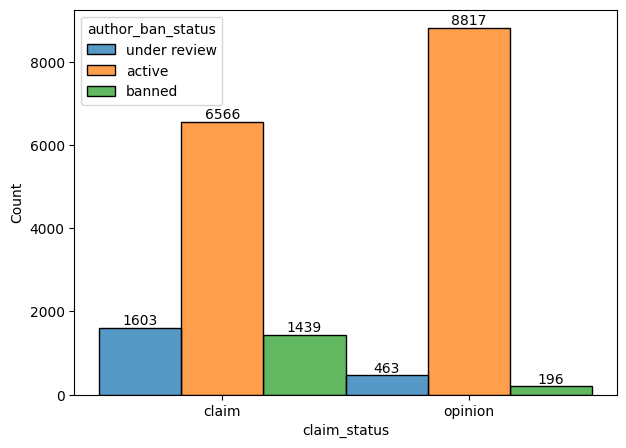

In [22]:
# Create a histogram
plt.figure(figsize=(7,5))
ax = sns.histplot(data,
             x="claim_status",
             hue="author_ban_status",
             multiple="dodge")

for i in ax.containers:
  plt.bar_label(i) 

plt.show()

**Reports with claims have slightly fewer unbanned authors, but they have 7 times more banned authors and 3 times more authors under review**

In [23]:
rates_list = ['video_view_count','video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']    

In [24]:
rates_proportion = data.groupby(["claim_status"])[rates_list].sum() / data.groupby(["claim_status"])[rates_list].sum().sum()
rates_proportion.loc[:,"mean_ratio"] = rates_proportion.sum(axis="columns") / len(rates_proportion.columns)
rates_proportion

,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,mean_ratio
claim_status,,,,,,
claim,0.990338,0.993564,0.993557,0.993529,0.996166,0.993431
opinion,0.009662,0.006436,0.006443,0.006471,0.003834,0.006569


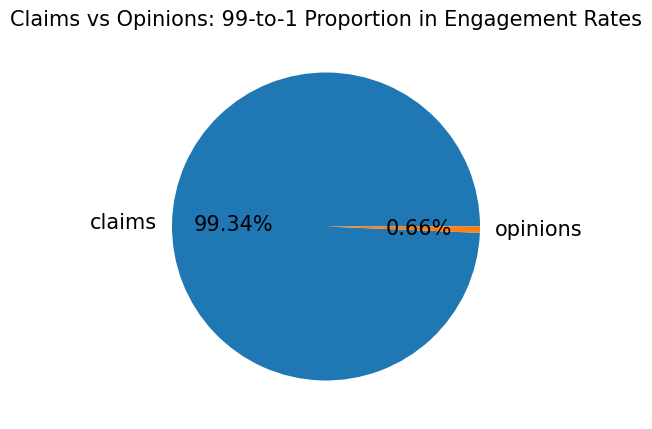

In [25]:
# Create a pie graph
plt.figure(figsize=(5,5),)
ax = plt.pie(rates_proportion["mean_ratio"], labels=['claims','opinions'],autopct='%.2f%%',textprops={'fontsize': 15})
plt.title("Claims vs Opinions: 99-to-1 Proportion in Engagement Rates", fontsize=15)

plt.show()


**In this pie chart, you can observe the mean proportion of all engagement rates for views, likes, shares, downloads and comments in videos categorized as claims or opinions. <br>
For example, 99% of all views belong to videos with claims.**

# **Remove Outlier**
**Problem:** Extreme Outliers can have an negative impact on the predictive model <br>
**Solution:** Remove reports that have a higher z-score than 3 or lower than -3 in each of the continuous variables. 

In [26]:
data

,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,59,someone shared w...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,32,someone shared w...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,31,someone shared w...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,25,someone shared w...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,19,someone shared w...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...
19079,opinion,49,in our opinion t...,not verified,active,6067.0,423.0,81.0,8.0,2.0
19080,opinion,23,in our opinion t...,not verified,active,2973.0,820.0,70.0,3.0,0.0
19081,opinion,50,in our opinion t...,not verified,active,734.0,102.0,7.0,2.0,1.0
19082,opinion,8,in our opinion l...,not verified,active,3394.0,655.0,123.0,11.0,4.0


In [27]:
data.columns

Index(['claim_status', 'video_duration_sec', 'video_transcription_text',
       'verified_status', 'author_ban_status', 'video_view_count',
       'video_like_count', 'video_share_count', 'video_download_count',
       'video_comment_count'],
      dtype='object')

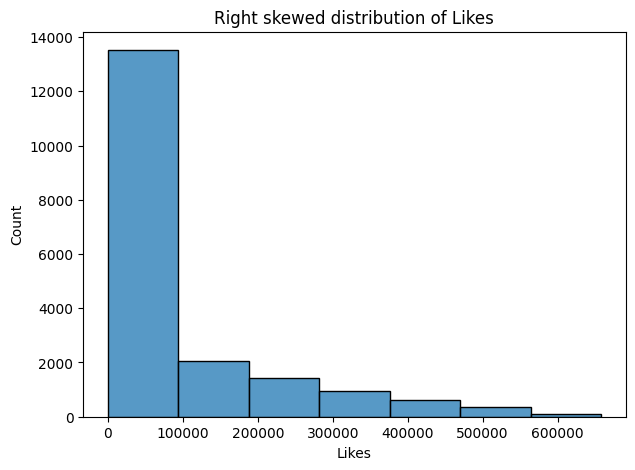

In [28]:
plt.figure(figsize=(7,5))
sns.histplot(x=data["video_like_count"],binwidth=1e5)
plt.xlabel("Likes")
plt.title("Right skewed distribution of Likes")
plt.show()

In [29]:
data[data["video_like_count"] <1e5].shape[0] / data.shape[0]

0.7169880528191155

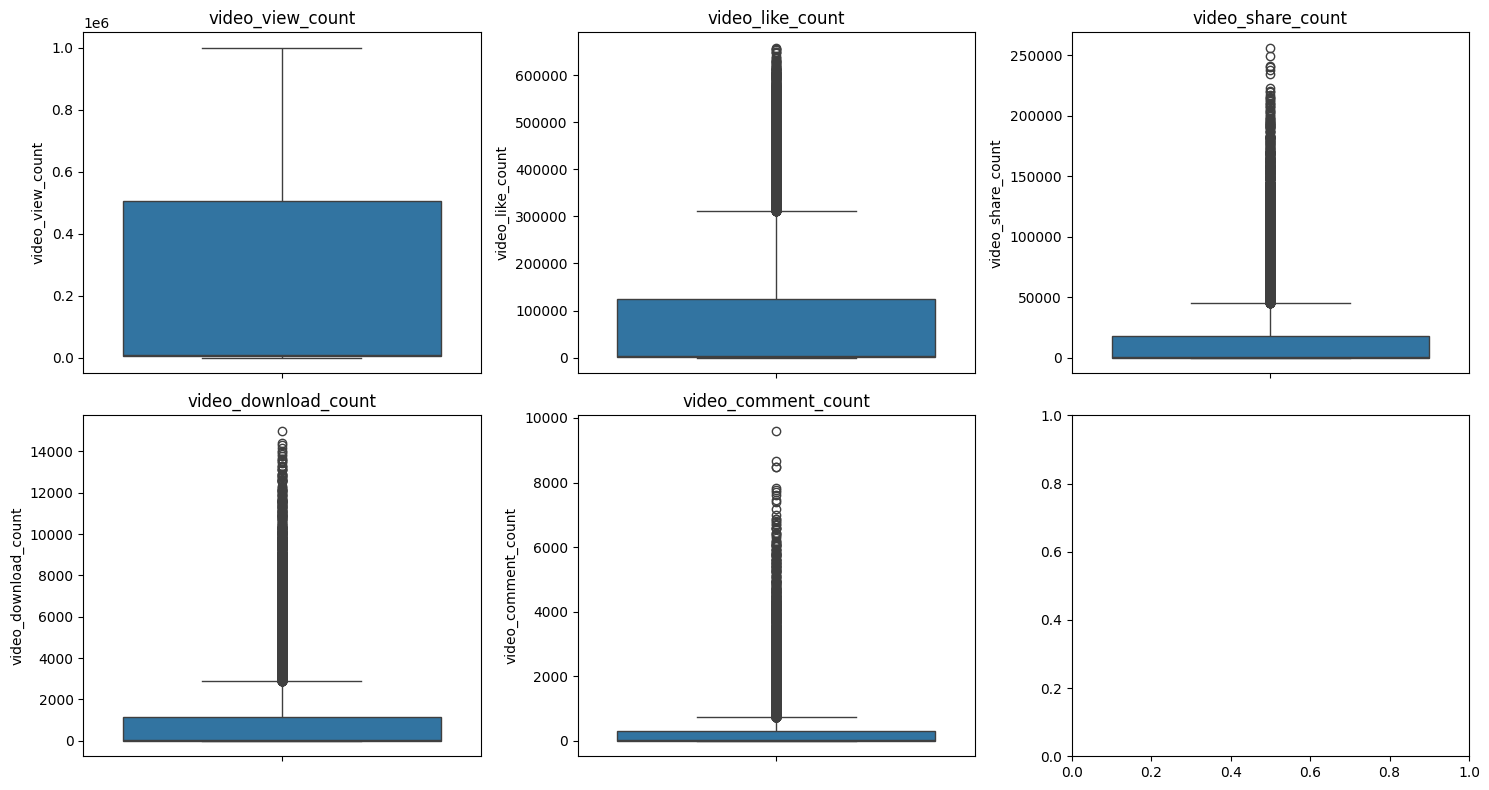

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

for i, column in enumerate(rates_list):
    sns.boxplot(y=data[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

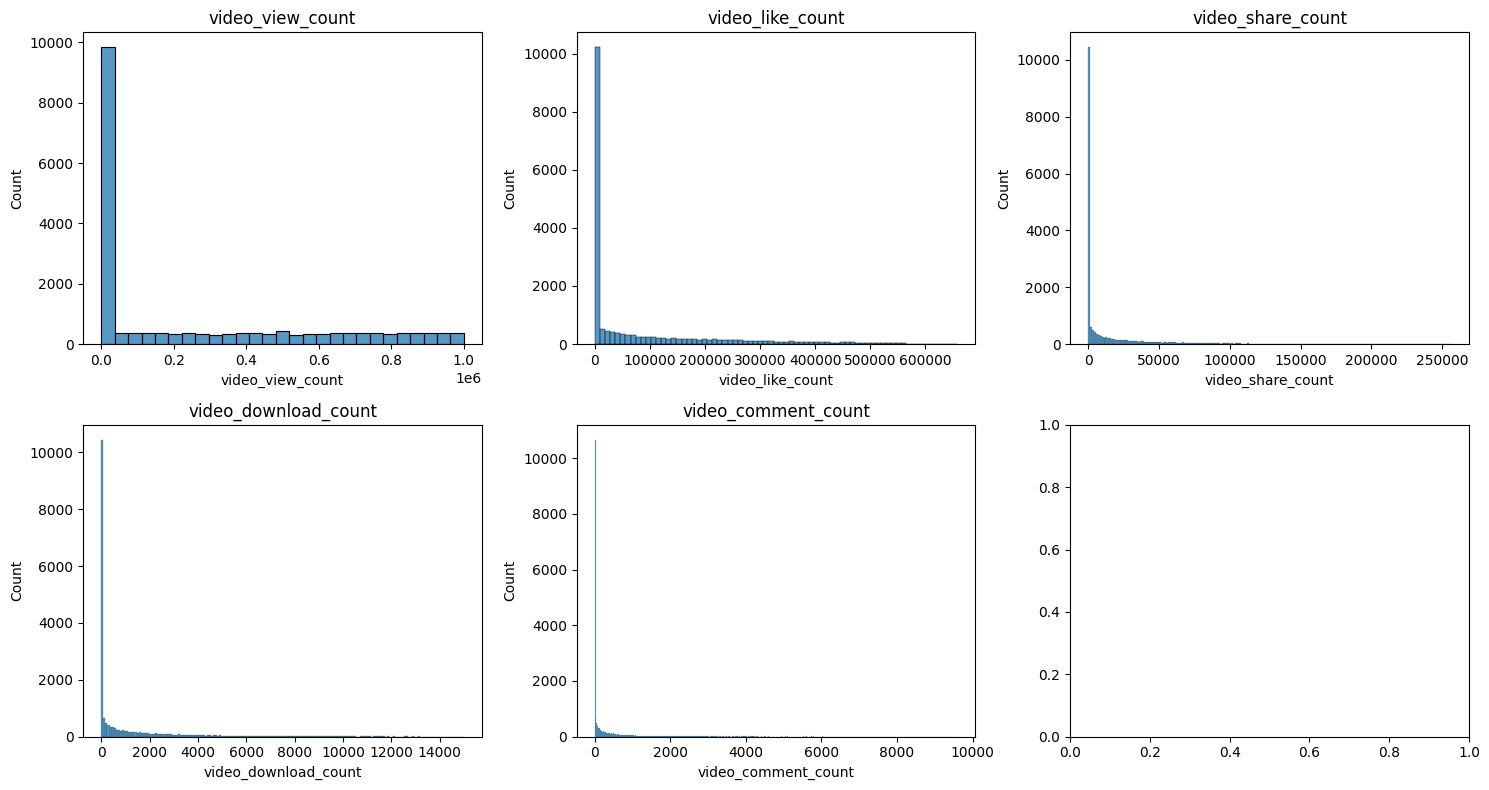

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

for i, column in enumerate(rates_list):
    sns.histplot(x=data[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

**Problem:** As you can see all rates are right skewed, because videos with claims have much rates as videos with opinions as discovered before. But for later actions a normal distribution is needed. <br>
**Action:** Therefore the rates will be log-transformed, that means data = ln(data).**

In [32]:
for r in rates_list:
  data[r+"_log"] = data[r].apply(lambda x: 0 if x==0 else np.log(x))
data

,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_view_count_log,video_like_count_log,video_share_count_log,video_download_count_log,video_comment_count_log
0,claim,59,someone shared w...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,12.746348,9.874316,5.484797,0.000000,0.000000
1,claim,32,someone shared w...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,11.855642,11.256160,9.853982,7.057037,6.527958
2,claim,31,someone shared w...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,13.712575,11.489554,7.957877,6.725034,5.796058
3,claim,25,someone shared w...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,12.988846,12.388203,10.457717,7.118016,6.369901
4,claim,19,someone shared w...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,10.936085,10.462732,8.321178,6.304449,5.023881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19079,opinion,49,in our opinion t...,not verified,active,6067.0,423.0,81.0,8.0,2.0,8.710620,6.047372,4.394449,2.079442,0.693147
19080,opinion,23,in our opinion t...,not verified,active,2973.0,820.0,70.0,3.0,0.0,7.997327,6.709304,4.248495,1.098612,0.000000
19081,opinion,50,in our opinion t...,not verified,active,734.0,102.0,7.0,2.0,1.0,6.598509,4.624973,1.945910,0.693147,0.000000
19082,opinion,8,in our opinion l...,not verified,active,3394.0,655.0,123.0,11.0,4.0,8.129764,6.484635,4.812184,2.397895,1.386294


In [33]:
rates_list_log = [x + "_log" for x in rates_list]
rates_list_log

['video_view_count_log',
 'video_like_count_log',
 'video_share_count_log',
 'video_download_count_log',
 'video_comment_count_log']

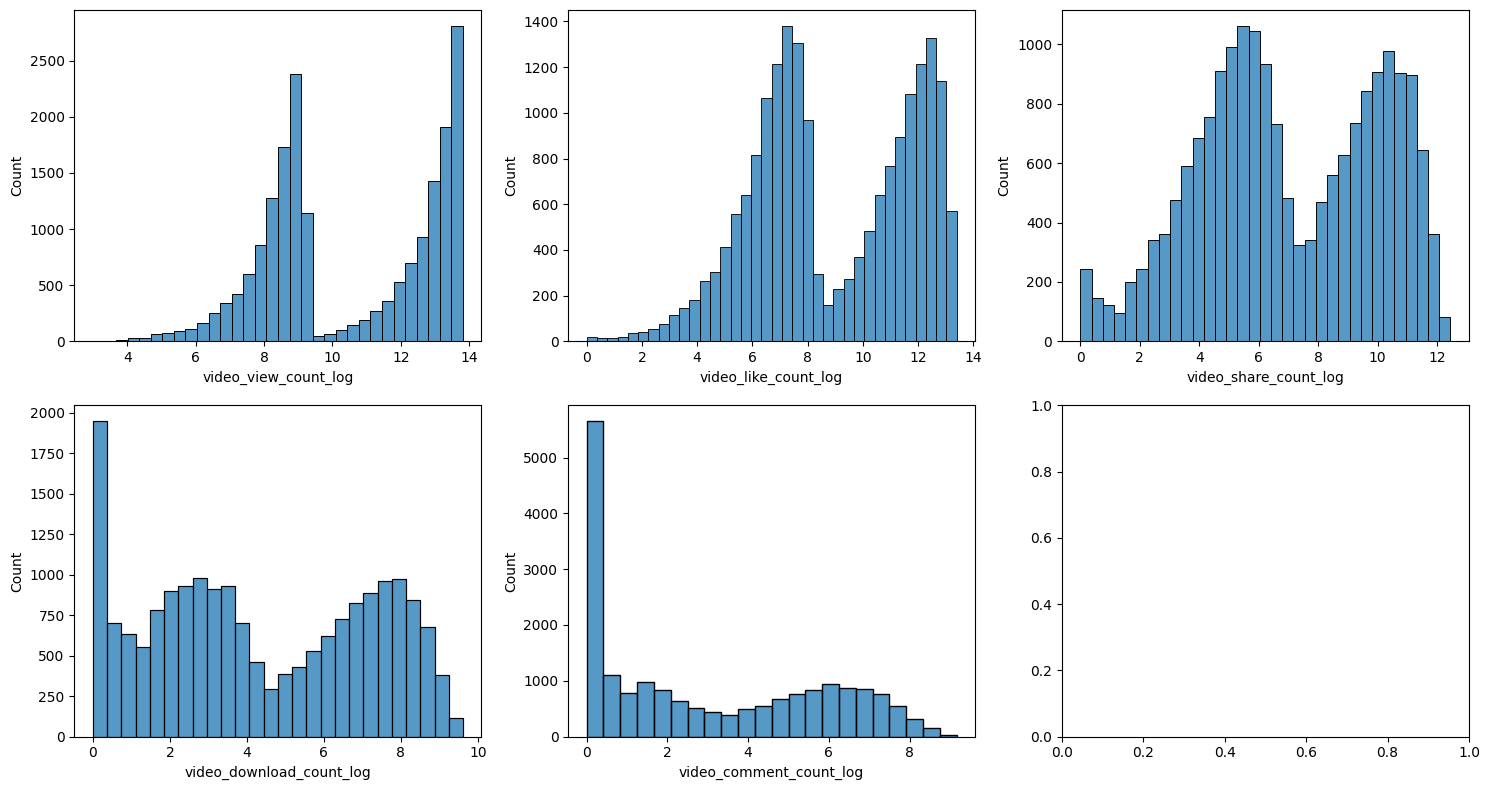

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

for i, column in enumerate(rates_list_log):
    sns.histplot(x=data[column], ax=axes[i])

plt.tight_layout()
plt.show()

**Result:** Now the distributions are more normal than before. These histograms obviously show that the data is divided into two groups. We can assume that these groups can be distinguished by the claim status based on this EDA and based on the following hypothesis testing.

**For the porpuse of removing outliers, now calculating the z-score of the data is much more appropriate because the assumption of normal distribution is met.**

In [35]:
data.shape

(19084, 15)

In [36]:
# data without outlier = take all reports that has 0 outlier out of the 5 rates
wo_data_log = data[( (zscore(data[rates_list_log]) < 3) & (zscore(data[rates_list_log]) > -3) ).all(axis=1)]#.reset_index(drop=True)
wo_data_log.shape

(19064, 15)

**The outliers were removed.<br>
There are other methods to handle outliers. <br> 
For example: Replacing the outliers with maximum/minimum valid value or mean/median value, or Forward Filling. <br>
But in this case, the outliers were just removed.**

In [38]:
try:
  with open("../datasets/tiktok_dataset_cleaned.csv", "r"):
    print("File already exists")
except FileNotFoundError:
  wo_data_log.to_csv("../datasets/tiktok_dataset_cleaned.csv", index=False)